In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import seaborn as sns
df =sns.load_dataset('titanic')

In [3]:
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

# Check the missing Values

In [4]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [6]:
df.isnull().sum().count()

np.int64(15)

# Missing Value and imputing them

In [7]:
df.isnull().sum()/ len(df)* 100

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


# Drop the Column

In [9]:
df.drop('deck', axis=1,inplace=True)
# inplace = true so update the dataset . without it when we again rerun df , deck is again show in columns.

# Filling the missing Values

In [10]:
df['age'].mean()

np.float64(29.69911764705882)

In [11]:
df.age.mean()

np.float64(29.69911764705882)

In [13]:
df['age'].fillna(df['age'].mean(), inplace= True)

<ipython-input-13-c491017eab64>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace= True)


In [17]:
df['age'].mode()[0]

np.float64(29.69911764705882)

In [15]:
df['age'].median()

29.69911764705882

# Fill embark and embark_town with mode

In [19]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace =True)

In [20]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace = True)

In [22]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


# Heatmap

<Axes: >

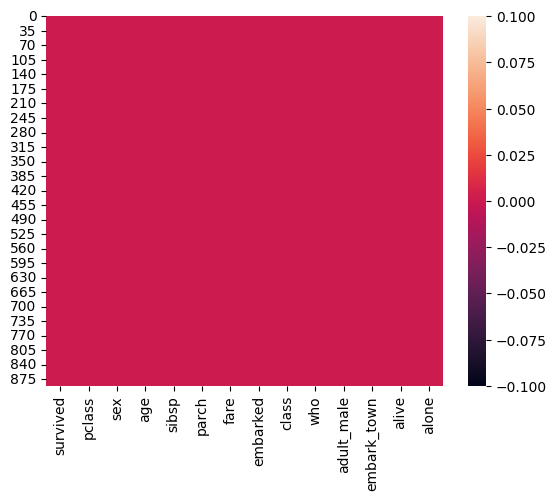

In [24]:
sns.heatmap(df.isnull())

# Binning

In [27]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [28]:
df.age.min()

0.42

In [29]:
df.age.max()

80.0

<Axes: xlabel='age', ylabel='Count'>

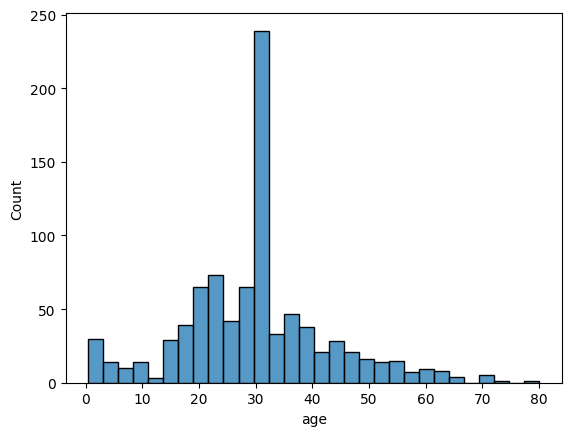

In [30]:
sns.histplot(df['age'])

<Axes: xlabel='age', ylabel='Count'>

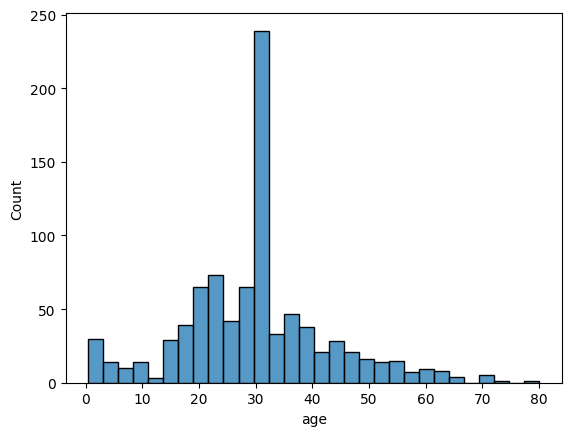

In [31]:
sns.histplot(df['age'])

<Axes: xlabel='alive', ylabel='Count'>

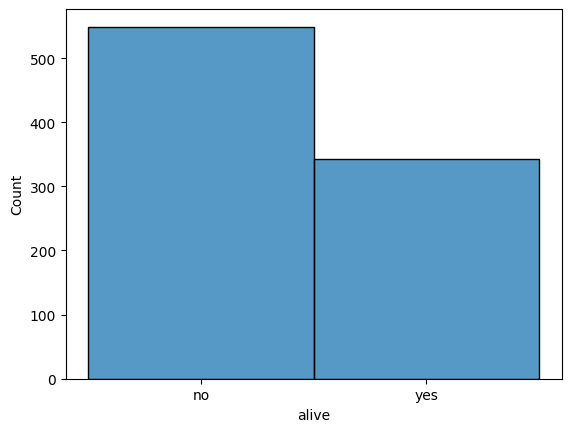

In [32]:
sns.histplot(df['alive'])

# Binning of the age

In [34]:
bins =[0,1,5,12,18,30,50,80]
labels =['infants','toddlers','kids', 'teens','youngs','middle_age','old']
pd.cut(df['age'], bins=bins, labels=labels)

,age
0,youngs
1,middle_age
2,youngs
3,middle_age
4,middle_age
...,...
886,youngs
887,youngs
888,youngs
889,youngs


# Feature Engineering

In [35]:
bins =[0,1,5,12,18,30,50,80]
labels =['infants','toddlers','kids', 'teens','youngs','middle_age','old']
df['binned_age']=pd.cut(df['age'], bins=bins, labels=labels)

In [36]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,middle_age
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,middle_age
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,middle_age


In [37]:
df['binned_age'].value_counts()

,count
binned_age,
youngs,447
middle_age,241
teens,70
old,64
toddlers,30
kids,25
infants,14


# Renaming a Column

In [39]:
df.rename(columns ={'binned_age': 'age_groups'} ,inplace=True)

In [40]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,middle_age
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,middle_age
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,middle_age
